In [1]:
# This is required first for inline plot rendering in IPython Notebooks
%matplotlib inline

In [2]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import HoltWinters.py module
import HoltWinters as hw

# Unit Tests

In [4]:
# define assert_almost_equal
assert_almost_equal = np.testing.assert_almost_equal

# configure to test zero-step predictions of 4 "season" cycles
m=4
t=np.linspace(0,2*np.pi,m+1)[:-1]
hstep=0

# initial slope is 0; average age is infinite
b0=0
beta=1/np.inf

# initial trendline is 0; average age is 12 steps
l0=0
alpha=1/12.

# initial seasonal correction is sinusoid; average age is 12 steps
s0=np.sin(t)[0:4]
gamma=1/12.*m

# standard deviation of unit-amplitude sinusoid
sigma0=[np.sqrt(0.5)]

In [5]:
# predict three cycles ahead given l0 and s0, no inputs,
# and assume PI only grows with trendline adjustments
yobs1 = np.zeros(12) * np.nan
yhat1, shat1, sighat1, _, _, _, _, _ = hw.additive(yobs1, m, alpha=alpha, beta=0, gamma=0, 
                                                   s0=s0, l0=0, b0=0, sigma0=sigma0, hstep=hstep)

# check output
assert_almost_equal(yhat1, [0,1,0,-1,0,1,0,-1,0,1,0,-1])
assert_almost_equal(shat1, [0,1,0,-1,0,1,0,-1,0,1,0,-1])
assert_almost_equal(sighat1, [0.70710678, 0.70955777, 0.71200031, 0.71443451,
                              0.71686044, 0.71927819, 0.72168784, 0.72408947,
                              0.72648316, 0.72886899, 0.73124703, 0.73361737])

print 'PASS'

PASS


In [6]:
# predict three cycles ahead given l0 and s0, no inputs,
# and assume PI only grows with seasonal adjustments
yobs1 = np.zeros(12) * np.nan
yhat1, shat1, sighat1, _, _, _, _, _ = hw.additive(yobs1, m, alpha=0, beta=0, gamma=gamma, 
                                                   s0=s0, l0=0, b0=0, sigma0=sigma0, hstep=hstep)

# check output
assert_almost_equal(yhat1, [0,1,0,-1,0,1,0,-1,0,1,0,-1])
assert_almost_equal(shat1, [0,1,0,-1,0,1,0,-1,0,1,0,-1])
assert_almost_equal(sighat1, [0.70710678, 0.70710678, 0.70710678, 0.70710678,
                              0.74535599, 0.74535599, 0.74535599, 0.74535599,
                              0.78173596, 0.78173596, 0.78173596, 0.78173596])

print 'PASS'

PASS


In [7]:
# smooth three cycles' worth of zero-value input observations,
# assuming only the trendline varies
yobs1 = np.zeros(12)
yhat1, shat1, sighat1, _, _, _, _, _ = hw.additive(yobs1, m, alpha=alpha, beta=0, gamma=0, 
                                                   s0=s0, l0=0, b0=0, sigma0=sigma0, hstep=hstep)

# check output
assert_almost_equal(yhat1, [         0,          1,-0.08333333,-1.07638889,
                            0.01331019, 1.01220100,-0.07214908,-1.06613666,
                            0.02270806, 1.02081573,-0.06425225,-1.0588979], 8)
assert_almost_equal(shat1, [         0,          1,          0,        -1,
                                     0,          1,          0,        -1,
                                     0,          1,          0,        -1], 8)
assert_almost_equal(sighat1, [0.64818122, 0.67749945, 0.62798561, 0.66535255,
                              0.61101568, 0.64444779, 0.59675623, 0.63587127,
                              0.58477433, 0.62111112, 0.57470621, 0.61505552], 8)

print 'PASS'

PASS


In [8]:
# smooth three cycles' worth of zero-value input observations,
# assuming only the seasonal adjustments vary
yobs1 = np.zeros(12)
yhat1, shat1, sighat1, _, _, _, _, _ = hw.additive(yobs1, m, alpha=0, beta=0, gamma=gamma, 
                                                   s0=s0, l0=0, b0=0, sigma0=sigma0, hstep=hstep)

# check output
assert_almost_equal(yhat1, [         0,          1,          0,         -1,
                                     0, 0.66666667,          0,-0.66666667,
                                     0, 0.44444444,          0,-0.44444444], 8)
assert_almost_equal(shat1, [         0,          1, 0.08333333,-0.91666667,
                                     0, 0.66666667, 0.05555556,-0.61111111,
                                     0, 0.44444444, 0.03703704,-0.40740741], 8)
assert_almost_equal(sighat1, [0.70710678, 0.70710678, 0.70710678, 0.70710678,
                              0.70710678, 0.70710678, 0.70710678, 0.70710678,
                              0.70710678, 0.70710678, 0.70710678, 0.70710678], 8)

print 'PASS'

PASS


In [9]:
# smooth three cycles' worth of sinusoid input observations,
# assuming only the seasonal adjustments vary, starting at zero
yobs1 = np.concatenate((s0,s0,s0))
yhat1, shat1, sighat1, _, _, _, _, _ = hw.additive(yobs1, m, alpha=0, beta=0, gamma=gamma, 
                                                   s0=s0*0, l0=0, b0=0, sigma0=sigma0, hstep=hstep)

# check output
assert_almost_equal(yhat1, [         0,          0,          0,          0,
                                     0, 0.33333333,          0,-0.33333333,
                                     0, 0.55555556,          0,-0.55555556], 8)
assert_almost_equal(shat1, [         0,          0,-0.08333333,-0.08333333,
                                     0, 0.33333333,-0.05555556,-0.38888889,
                                     0, 0.55555555,-0.03703704,-0.59259259], 8)
assert_almost_equal(sighat1, [0.70710678, 0.70710678, 0.70710678, 0.70710678,
                              0.70710678, 0.70710678, 0.70710678, 0.70710678,
                              0.70710678, 0.70710678, 0.70710678, 0.70710678], 8)

print 'PASS'

PASS


# Construct synthetic time series

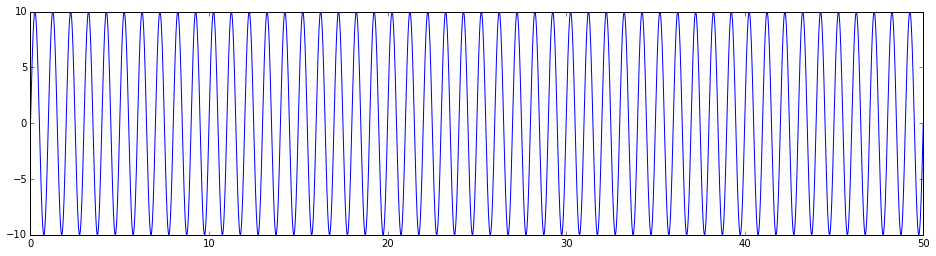

In [10]:
# first 50 "days" at 100 samples per synthetic "day"
t000to050 = np.arange(5001)
syn000to050 = 10. * np.sin(t000to050 * (2*np.pi)/100.)
plt.figure(figsize=(16,4))
plt.plot(t000to050/100., syn000to050)

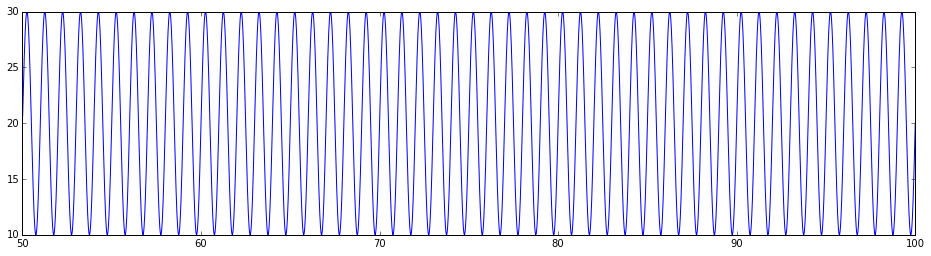

In [11]:
# next 50 "days"
t050to100 = np.arange(5001,10001)
syn050to100 = 20 + 10. * np.sin(t050to100 * (2*np.pi)/100.)
plt.figure(figsize=(16,4))
plt.plot(t050to100/100., syn050to100)

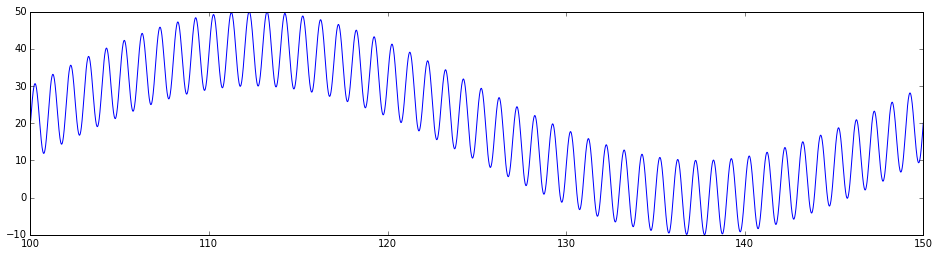

In [12]:
# next 50 "days"
t100to150 = np.arange(10001,15001)
syn100to150 = 20 + 10. * np.sin(t100to150 * (2*np.pi)/100.) + 20*np.sin(t100to150 * (2*np.pi)/5000.)
plt.figure(figsize=(16,4))
plt.plot(t100to150/100., syn100to150)

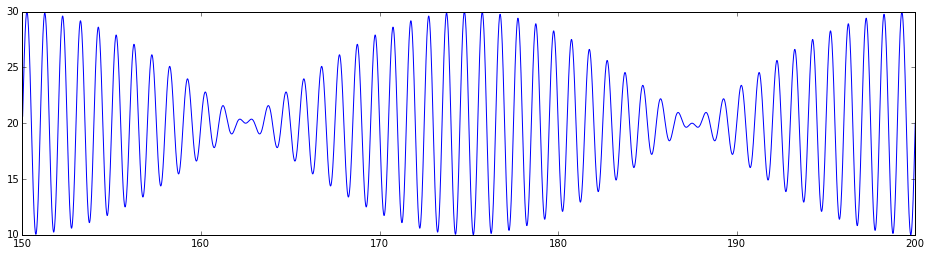

In [13]:
# next 50 "days"
t150to200 = np.arange(15001,20001)
syn150to200 = 20 + (10. * np.sin(t150to200 * (2*np.pi)/100.)) * (1*np.cos(t150to200 * (2*np.pi)/5000.))
plt.figure(figsize=(16,4))
plt.plot(t150to200/100., syn150to200)

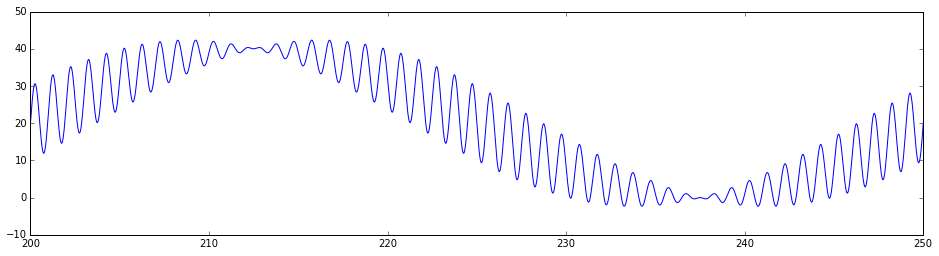

In [14]:
# next 50 "days"
t200to250 = np.arange(20001,25001)
syn200to250 = 20 + ((10. * np.sin(t200to250 * (2*np.pi)/100.)) * (1*np.cos(t200to250 * (2*np.pi)/5000.)) + 
                  20*np.sin(t200to250 * (2*np.pi)/5000.) )
plt.figure(figsize=(16,4))
plt.plot(t200to250/100., syn200to250)

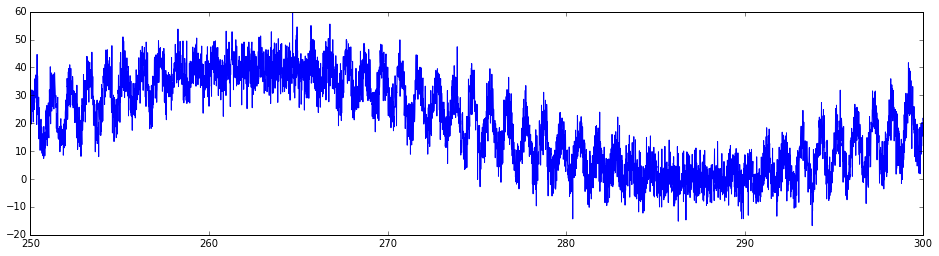

In [15]:
# next 50 "days"
t250to300 = np.arange(25001,30001)
np.random.seed(123456789)
syn250to300 = 20 + ((10. * np.sin(t250to300 * (2*np.pi)/100.)) * (1*np.cos(t250to300 * (2*np.pi)/5000.)) + 
                  20*np.sin(t250to300 * (2*np.pi)/5000.) ) + 5 * np.random.randn(5000)
plt.figure(figsize=(16,4))
plt.plot(t250to300/100., syn250to300)

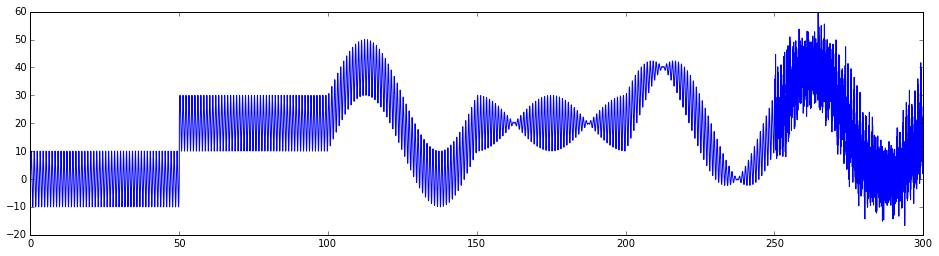

In [16]:
# all 300 "days
t000to300 = np.concatenate((t000to050,t050to100,t100to150,t150to200,t200to250, t250to300))
syn000to300 = np.concatenate((syn000to050,syn050to100,syn100to150,syn150to200,syn200to250, syn250to300))
plt.figure(figsize=(16,4))
plt.plot(t000to300/100., syn000to300)

# Apply Holt-Winters exponential smoother

In [17]:
# set up HW smoothing parameters
m = 100 # length of "day"
alpha = 1./100./3. # average age of level is 3 "days"
beta = 0 # slope doesn't change
gamma = 1./100.*100./3. # average age of "seasonal" correction is e "days"
phi = 1 # don't dampen the slope

# initialize states for HW smoother
l0 = None # this uses algorithm's default initial level
b0 = 0 # this is NOT the algorithm's default initial slope
s0 = None # this uses algorithm's default initial "seasonal" correction
sigma0 = [0] # this is NOT the algorithm's default initial standard deviation

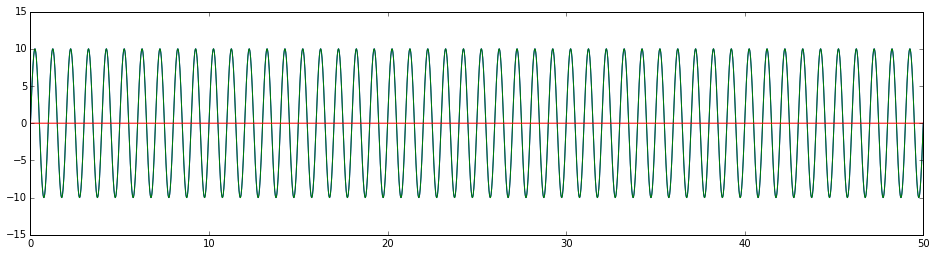

In [18]:
# first 50 "days"
(synHat000to050, sHat000to050, sigma000to050,
 syn050, s050, l050, b050, sigma050) = hw.additive(syn000to050, m, alpha, beta, gamma, phi,
                                                   yhat0=None, l0=l0, b0=b0, s0=s0, sigma0=sigma0)

plt.figure(figsize=(16,4))
plt.plot(t000to050/100., syn000to050, color='blue')
plt.plot(t000to050/100., synHat000to050, color='green')
plt.plot(t000to050/100., synHat000to050 - sHat000to050, color='red')

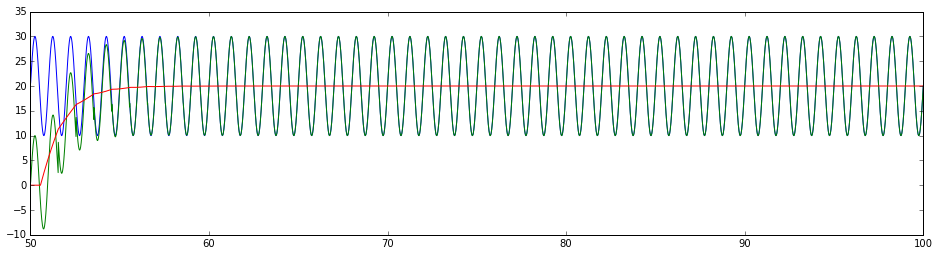

In [19]:
# next 50 "days"
(synHat050to100, sHat050to100, sigma050to100,
 syn100, s100, l100, b100, sigma100) = hw.additive(syn050to100, m, alpha, beta, gamma, phi,
                                                   yhat0=syn050, l0=l050, b0=b050, s0=s050, sigma0=sigma050)

plt.figure(figsize=(16,4))
plt.plot(t050to100/100., syn050to100, color='blue')
plt.plot(t050to100/100., synHat050to100, color='green')
plt.plot(t050to100/100., synHat050to100 - sHat050to100, color='red')

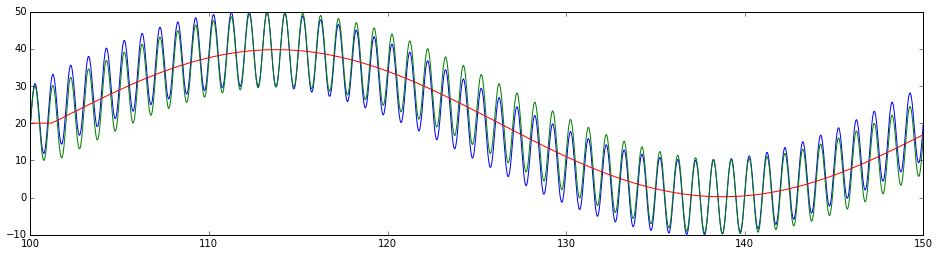

In [20]:
# next 50 "days"
(synHat100to150, sHat100to150, sigma100to150,
 syn150, s150, l150, b150, sigma150) = hw.additive(syn100to150, m, alpha, beta, gamma, phi,
                                                   yhat0=syn100, l0=l100, b0=b100, s0=s100, sigma0=sigma100)

plt.figure(figsize=(16,4))
plt.plot(t100to150/100., syn100to150, color='blue')
plt.plot(t100to150/100., synHat100to150, color='green')
plt.plot(t100to150/100., synHat100to150 - sHat100to150, color='red')

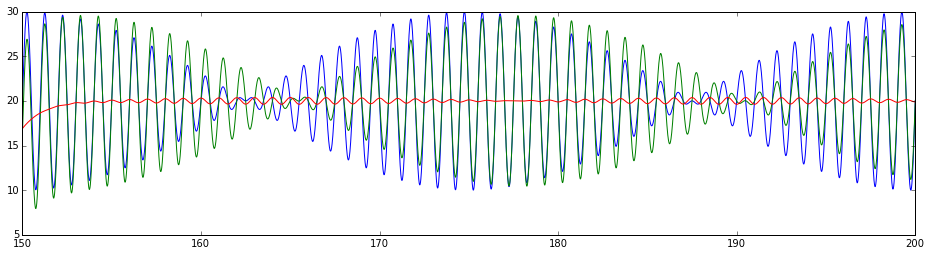

In [21]:
# next 50 "days"
(synHat150to200, sHat150to200, sigma150to200,
 syn200, s200, l200, b200, sigma200) = hw.additive(syn150to200, m, alpha, beta, gamma, phi,
                                                   yhat0=syn150, l0=l150, b0=b150, s0=s150, sigma0=sigma150)


plt.figure(figsize=(16,4))
plt.plot(t150to200/100., syn150to200, color='blue')
plt.plot(t150to200/100., synHat150to200, color='green')
plt.plot(t150to200/100., synHat150to200 - sHat150to200, color='red')

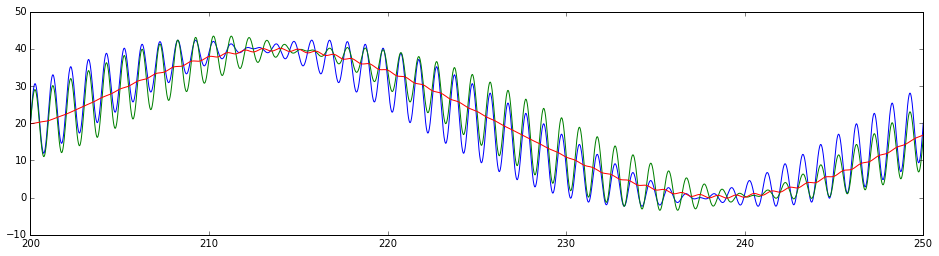

In [22]:
# next 50 "days"
(synHat200to250, sHat200to250, sigma200to250,
 syn250, s250, l250, b250, sigma250) = hw.additive(syn200to250, m, alpha, beta, gamma, phi,
                                                   yhat0=syn200, l0=l200, b0=b200, s0=s200, sigma0=sigma200)


plt.figure(figsize=(16,4))
plt.plot(t200to250/100., syn200to250, color='blue')
plt.plot(t200to250/100., synHat200to250, color='green')
plt.plot(t200to250/100., synHat200to250 - sHat200to250, color='red')

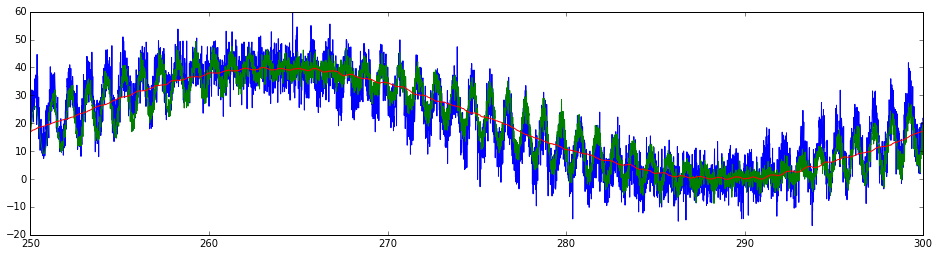

In [23]:
# next 50 "days"
(synHat250to300, sHat250to300, sigma250to300,
 syn300, s300, l300, b300, sigma300) = hw.additive(syn250to300, m, alpha, beta, gamma, phi,
                                                   yhat0=syn250, l0=l250, b0=b250, s0=s250, sigma0=sigma250)


plt.figure(figsize=(16,4))
plt.plot(t250to300/100., syn250to300, color='blue')
plt.plot(t250to300/100., synHat250to300, color='green')
plt.plot(t250to300/100., synHat250to300 - sHat250to300, color='red')